In [1]:
import sys
sys.path.append('..')

In [2]:
from flamingchoripan.myUtils.files import search_for_filedirs
from src import C_

root_folder = 'save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (save)
(0) - save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN_kfid-0.slcd - 4.775[mbs]
(1) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.656[mbs]
(2) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd - 2.656[mbs]
(3) - save/FakeSNe/survey-FakeSNe_bands-gr_classes-3_kfid-0.slcd - 3.639[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (save)
(0) - save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN_kfid-0.slcd - 4.775[mbs]
(1) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 2.656[mbs]
(2) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd - 2.656[mbs]
(3) - save/FakeSNe/survey-FakeSNe_bands-gr_classes-3_kfid-0.slcd - 3.639[mbs]
───────────────────────────

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from flamingchoripan.myUtils.files import get_dict_from_filedir
from src import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = 'save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN_kfid-0.slcd'
filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd'
#filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd'
#filedir = 'save/FakeSNe/survey-FakeSNe_bands-gr_classes-3_kfid-0.slcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset.raw.keys())
print(lcdataset.raw.get_random_lcobj(False).keys())
print(lcdataset)

> loading: save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset():
(raw) - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806) - max_length_serial: 205 - max_duration: 578.23
(train) - samples: 871 - obs samples: 21,780 (g: 8,907 - r: 12,873) - max_length_serial: 198 - max_duration: 578.23
(val) - samples: 222 - obs samples: 6,615 (g: 2,864 - r: 3,751) - max_length_serial: 204 - max_duration: 189.70
(test) - -
(raw_train) - samples: 877 - obs samples: 23,443 (g: 9,565 - r: 13,878) - max_length_serial: 199 - max_duration: 578.23
(raw_val) - samples: 222 - obs samples: 6,903 (g: 2,975 - r: 3,928) - max_length_serial: 205 - max_duration: 189.70
(raw_test) - -



# get error distribution fit

In [4]:
%load_ext autoreload
%autoreload 2
from src.error_fitting import get_values_distribution_fits, ValuesSampler
from src.plots import plot_values_fit_results, plot_values_fit_distr_sampler

set_name = 'train'
distr_names = ['rayleigh', 'expon', 'chi', 'gamma']#+ ['chi', 'skewnorm', 'beta']
fit_results = get_values_distribution_fits(lcdataset, set_name, distr_names)
plot_values_fit_results(lcdataset, set_name, fit_results)
obse_sampler = ValuesSampler(fit_results, 'gamma')
plot_values_fit_distr_sampler(lcdataset, set_name, obse_sampler, figsize=(13,5))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
distr_name: rayleigh - band: g - samples: 8,907 - params: (0.002579046023786068, 0.005723725816553985)
distr_name: rayleigh - band: r - samples: 12,873 - params: (0.002926527132987976, 0.00556166076766805)
distr_name: expon - band: g - samples: 8,907 - params: (0.002579046023786068, 0.00704296810388565)
distr_name: expon - band: r - samples: 12,873 - params: (0.002926527132987976, 0.006911728920638561)
distr_name: chi - band: g - samples: 8,907 - params: (1.8545386574692746, 0.002579046023786068, 0.00594404083887533)
distr_name: chi - band: r - samples: 12,873 - params: (2.013207608871773, 0.002926527132987976, 0.005543156312780035)
distr_name: gamma - band: g - samples: 8,907 - params: (3.0152757214318058, 0.002579046023786068, 0.002335762419439685)
distr_name: gamma - band: r - samples: 12,873 - params: (3.3365150344783245, 0.002926527132987976, 0.002071541391350022)


<Figure size 1200x500 with 2 Axes>

<Figure size 1300x500 with 2 Axes>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
distr_name: rayleigh - band: g - samples: 871 - params: (-1e-05, 9.287075216883458)
distr_name: rayleigh - band: r - samples: 871 - params: (-1e-05, 12.991923629414213)
distr_name: expon - band: g - samples: 871 - params: (-1e-05, 10.22618680826636)
distr_name: expon - band: r - samples: 871 - params: (-1e-05, 14.779573719862228)
distr_name: chi - band: g - samples: 871 - params: (0.9331916626039406, -1e-05, 13.59592142400369)
distr_name: chi - band: r - samples: 871 - params: (1.2264410951621512, -1e-05, 16.590741994708303)
distr_name: gamma - band: g - samples: 871 - params: (1.2831172710575256, -1e-05, 7.969799050275501)
distr_name: gamma - band: r - samples: 871 - params: (1.9071092299565868, -1e-05, 7.749725861375371)


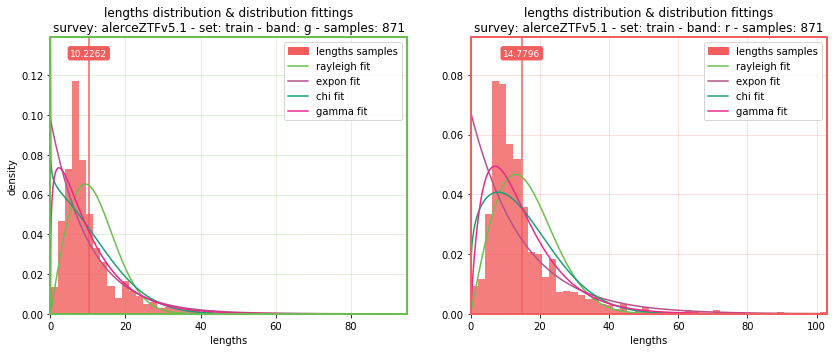

[40 53 53 43 47 44 44 40 41 43]


In [5]:
%load_ext autoreload
%autoreload 2
from src.error_fitting import get_len_distribution_fits, ValuesSampler
from src.plots import plot_len_fit_results

set_name = 'train'
distr_names = ['rayleigh', 'expon', 'chi', 'gamma']#+ ['chi', 'skewnorm', 'beta']
fit_results = get_len_distribution_fits(lcdataset, set_name, distr_names)
plot_len_fit_results(lcdataset, set_name, fit_results)
len_sampler = ValuesSampler(fit_results, 'rayleigh', 30, 'r', True)
print(len_sampler.sample(10))

# generate synth data

In [6]:
%load_ext autoreload
%autoreload 2
from src.curve_fits import calculate_parametric_model, get_synth_dataset

get_from_synthetic = False
desired_class_samples = 1000
#desired_class_samples = 2000
#desired_class_samples = 1000; get_from_synthetic = True # for umap

for set_name in ['train', 'val']:
    calculate_parametric_model(lcdataset, set_name)
    
for set_name in ['train']:
    get_synth_dataset(lcdataset, set_name, desired_class_samples, obse_sampler, len_sampler,
                     get_from_synthetic=get_from_synthetic,
                     )
    
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  0%|          | 4/871 [26.85it/s, set_name: train - key: ZTF18abxbmqh - pm_args: {'A': 0.18355649408139288, 't0': 49.20757256420058, 'gamma': 41.20172220848251, 'f': 0.5095262588965876, 'trise': 36.700030825112265, 'tfall': 81.74625247920288}]   

/home/opimentel/anaconda3/envs/pytorch/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


100%|██████████| 222/222 [32.63it/s, set_name: val - key: ZTF19acxxwrs - pm_args: {'A': 0.42817459048686846, 't0': -5.458968323830038, 'gamma': 19.268816720206168, 'f': 0.6432327625335685, 'trise': 1.0687528957277634, 'tfall': 11.584185296356395}] 
generating synthetic samples - set_name: train - desired_class_samples: 1,000 - max_obs: {'g': 1.4907691, 'r': 1.6553042}
100%|██████████| 4000/4000 [31.49it/s, get_from_synthetic: True - set_name: train - class_counter: {'SLSN': 1000, 'SNIa': 1000, 'SNIbc': 1000, 'merSNII': 1000} - key: ZTF18acyxnyw - new_key: ZTF18acyxnyw.62 - pm_args: {'A': 0.1780127414151219, 't0': 9.5125594835253, 'gamma': 97.95517630904723, 'f': 0.6112450594532004, 'trise': 6.602036634391675, 'tfall': 58.51306082743455}]         
LCDataset():
(raw) - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806) - max_length_serial: 205 - max_duration: 578.23
(train) - samples: 871 - obs samples: 21,780 (g: 8,907 - r: 12,873) - max_length_serial: 198 - max_duration: 578.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
class samples


[]

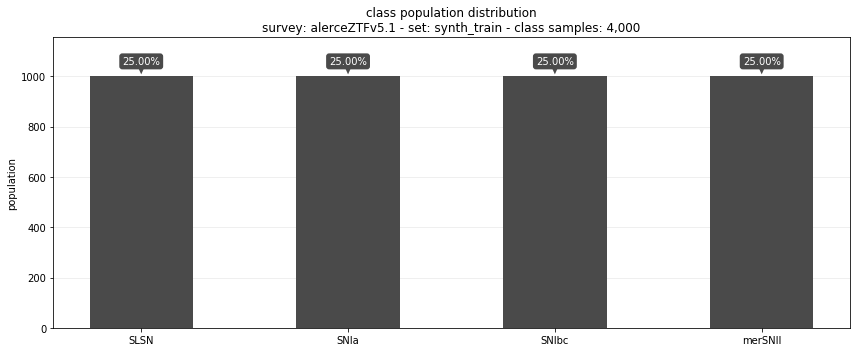

In [7]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
key: ZTF19abhduuo - synth_keys: ['ZTF19abhduuo.1', 'ZTF19abhduuo.2', 'ZTF19abhduuo.3', 'ZTF19abhduuo.4']


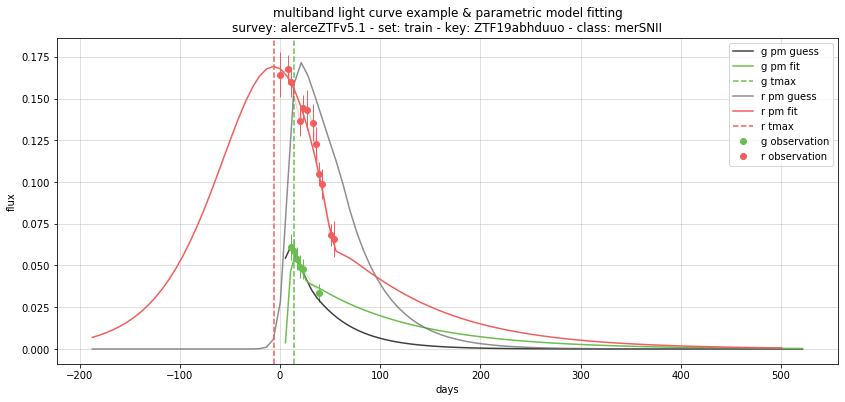

In [37]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [14]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


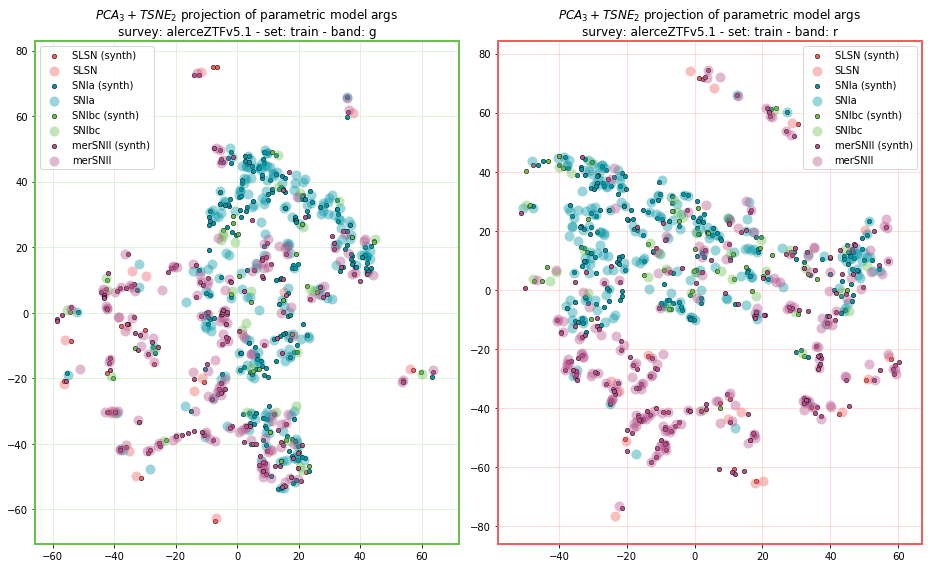

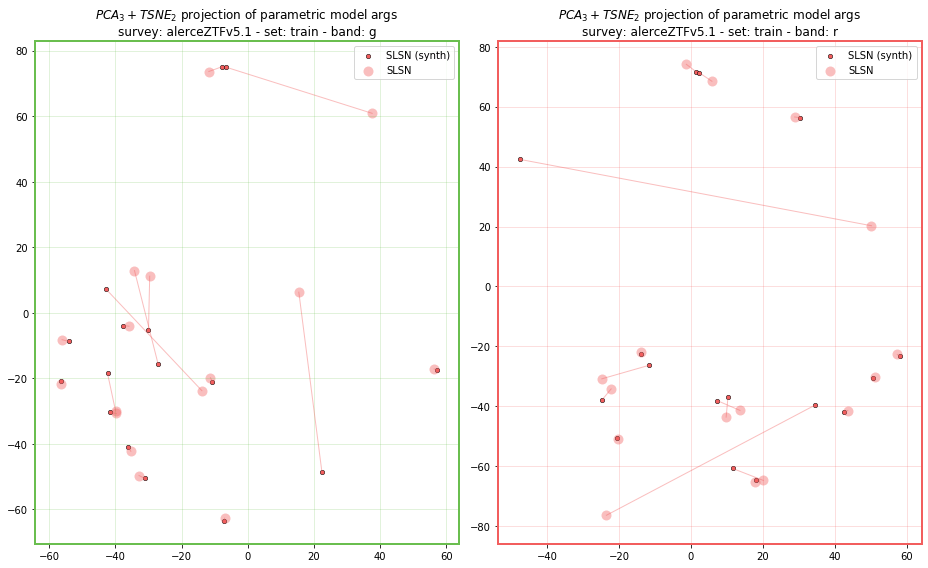

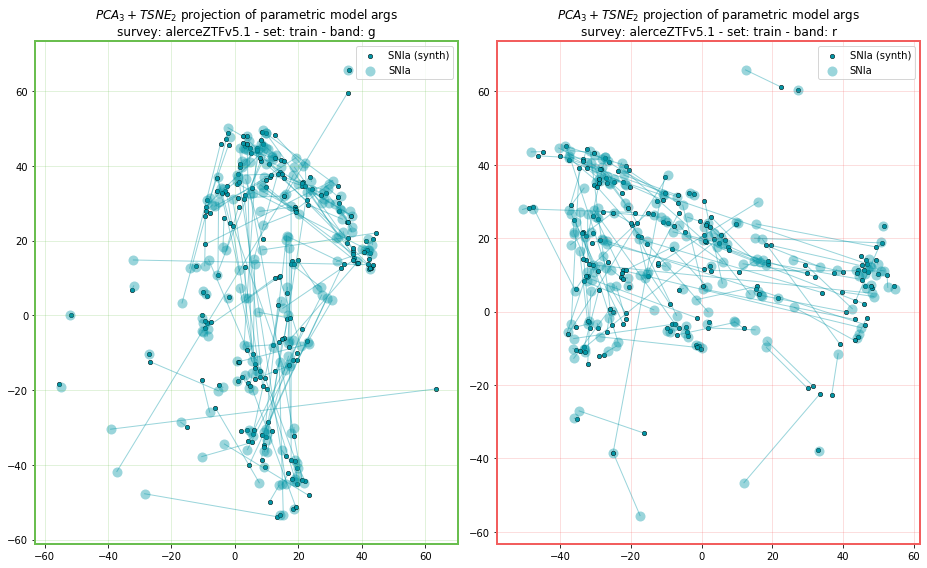

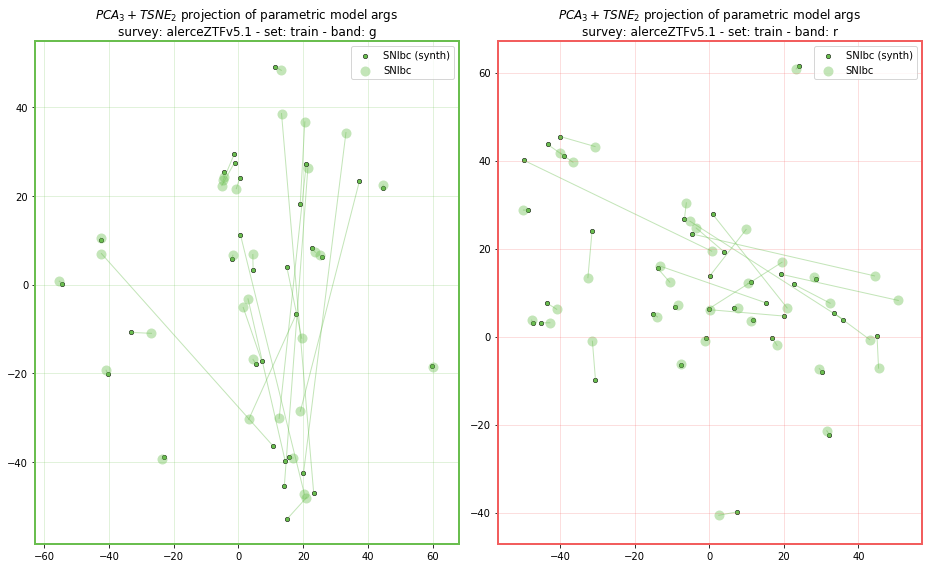

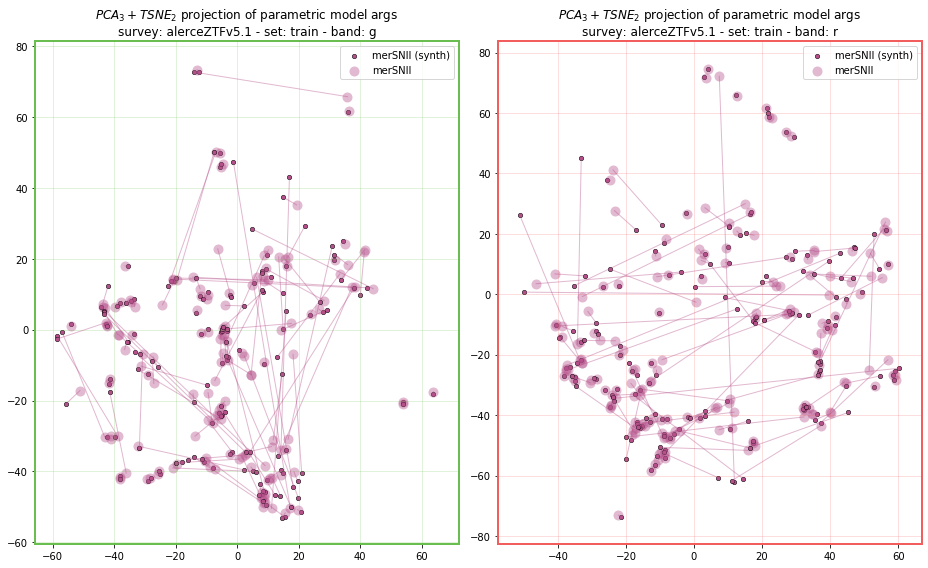

In [31]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [11]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)

AssertionError: 